<a href="https://colab.research.google.com/github/HaydenLundin/DSBA6160/blob/main/CCG_Consulting_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from collections import Counter

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import ValidationCurveDisplay, validation_curve
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSBA6276/Impact_of_Remote_Work_on_Mental_Health.csv', na_values= ['null', '?', 'NaN'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(5000, 20)

In [ ]:
df.dropna(subset=['Stress_Level'], inplace=True)
df.shape

(5000, 20)

In [ ]:
df.describe()
df.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [ ]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America
12,EMP0013,40,Female,Marketing,Consulting,1,Remote,21,7,2,High,Depression,Yes,Decrease,2,Neutral,1,Weekly,Good,Europe


In [ ]:
# Create mapping dictionary
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}

# Create new dummy variable
df['Stress_Level_Dummy'] = df['Stress_Level'].map(stress_level_map)

# Drop the original Stress_Level column
df = df.drop('Stress_Level', axis=1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


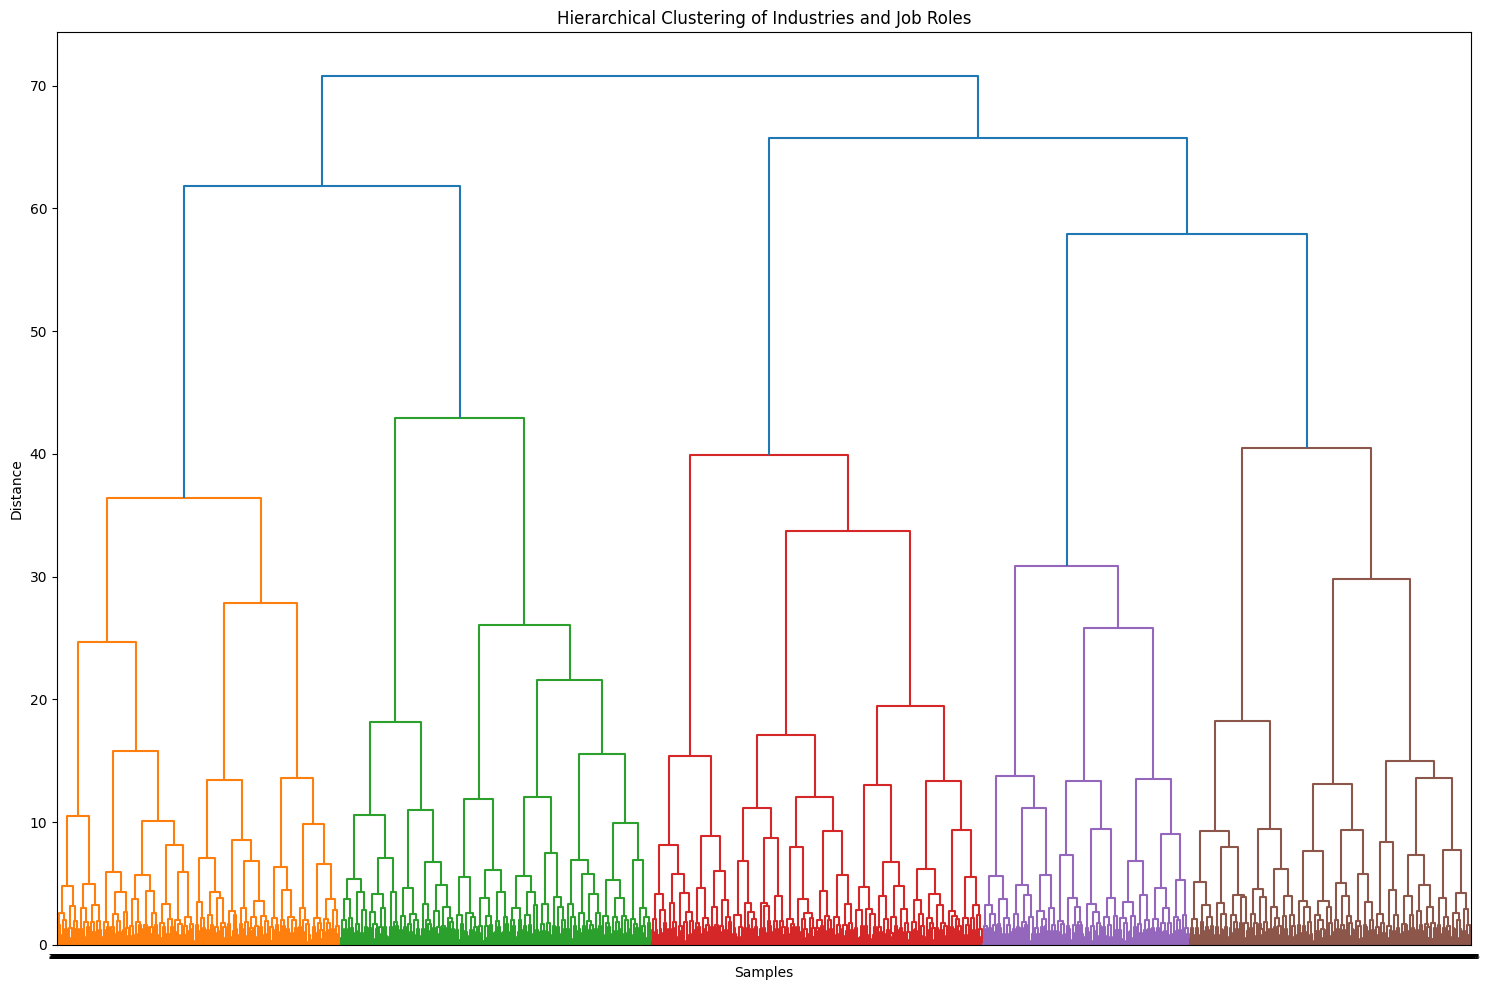


Cluster Sizes:
Cluster
1    1003
2    1101
3    1171
4    1725
dtype: int64

Detailed Cluster Analysis:

Cluster 1 Analysis:

Size: 1003 members

Industries Distribution:
Industry
Healthcare       174
Manufacturing    154
Finance          153
Education        147
Retail           134
IT               129
Consulting       112
Name: count, dtype: int64

Job Roles Distribution:
Job_Role
Software Engineer    350
Sales                330
Project Manager      231
Marketing             92
Name: count, dtype: int64

Numerical Metrics:
      Hours_Worked_Per_Week  Stress_Level_Dummy
mean                  51.65                2.11
std                    5.69                0.78
min                   36.00                1.00
max                   60.00                3.00
--------------------------------------------------

Cluster 2 Analysis:

Size: 1101 members

Industries Distribution:
Industry
Retail           357
Manufacturing    317
IT               290
Healthcare       125
Finance        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)  # Ensure all rows are displayed
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', None)  # Ensure wide DataFrames are displayed fully

# Prepare the data
features = ['Industry_encoded', 'Job_Role_encoded', 'Hours_Worked_Per_Week', 'Stress_Level_Dummy']
X = df[features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Create dendrogram with modified settings
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix,
           labels=None,  # Remove labels for clarity
           leaf_rotation=0)  # Reset rotation
plt.title('Hierarchical Clustering of Industries and Job Roles')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Cut the dendrogram to get clusters
from scipy.cluster.hierarchy import fcluster
n_clusters = 4  # Choose based on dendrogram
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
df['Cluster'] = clusters

# Print detailed cluster information
print("\nCluster Sizes:")
print(df.groupby('Cluster').size())

# Create more detailed cluster characteristics
print("\nDetailed Cluster Analysis:")
for cluster in range(1, n_clusters + 1):
    print(f"\nCluster {cluster} Analysis:")
    cluster_data = df[df['Cluster'] == cluster]

    print(f"\nSize: {len(cluster_data)} members")

    print("\nIndustries Distribution:")
    print(cluster_data['Industry'].value_counts())

    print("\nJob Roles Distribution:")
    print(cluster_data['Job_Role'].value_counts())

    print("\nNumerical Metrics:")
    metrics = cluster_data[['Hours_Worked_Per_Week', 'Stress_Level_Dummy']].agg(['mean', 'std', 'min', 'max'])
    print(metrics.round(2))

    print("-" * 50)

# Additional summary statistics
print("\nOverall Cluster Summary:")
summary_stats = df.groupby('Cluster').agg({
    'Hours_Worked_Per_Week': ['mean', 'std'],
    'Stress_Level_Dummy': ['mean', 'std'],
    'Industry': lambda x: len(set(x)),  # unique industries count
    'Job_Role': lambda x: len(set(x))   # unique roles count
}).round(2)

# Rename columns for clarity
summary_stats.columns = ['Avg Hours', 'Std Hours', 'Avg Stress', 'Std Stress', 'Unique Industries', 'Unique Roles']
print(summary_stats)

In [ ]:
# Detailed analysis for each cluster
for cluster_num in range(1, 5):  # For clusters 1-4
   print(f"\n{'='*80}")
   print(f"CLUSTER {cluster_num} DETAILED ANALYSIS")
   print(f"{'='*80}")

   # Get data for current cluster
   cluster_data = df[df['Cluster'] == cluster_num]

   # Industry Analysis
   print("\nBREAKDOWN BY INDUSTRY:")
   print("-" * 50)
   industry_stats = cluster_data.groupby('Industry').agg({
       'Hours_Worked_Per_Week': ['count', 'mean', 'std', 'min', 'max'],
       'Stress_Level_Dummy': ['mean', 'std', 'min', 'max']
   }).round(2)

   # Rename columns for clarity
   industry_stats.columns = ['Count', 'Avg Hours', 'Std Hours', 'Min Hours', 'Max Hours',
                           'Avg Stress', 'Std Stress', 'Min Stress', 'Max Stress']
   print(industry_stats)

   # Job Role Analysis
   print("\nBREAKDOWN BY JOB ROLE:")
   print("-" * 50)
   role_stats = cluster_data.groupby('Job_Role').agg({
       'Hours_Worked_Per_Week': ['count', 'mean', 'std', 'min', 'max'],
       'Stress_Level_Dummy': ['mean', 'std', 'min', 'max']
   }).round(2)

   # Rename columns for clarity
   role_stats.columns = ['Count', 'Avg Hours', 'Std Hours', 'Min Hours', 'Max Hours',
                        'Avg Stress', 'Std Stress', 'Min Stress', 'Max Stress']
   print(role_stats)

   # Cross-tabulation of Industry and Job Role
   print("\nINDUSTRY-JOB ROLE DISTRIBUTION:")
   print("-" * 50)
   cross_tab = pd.crosstab(cluster_data['Industry'], cluster_data['Job_Role'])
   print(cross_tab)

   # Overall cluster statistics
   print("\nOVERALL CLUSTER STATISTICS:")
   print("-" * 50)
   cluster_overall = cluster_data.agg({
       'Hours_Worked_Per_Week': ['count', 'mean', 'std', 'min', 'max'],
       'Stress_Level_Dummy': ['mean', 'std', 'min', 'max']
   }).round(2)

   # Rename indices for clarity
   cluster_overall.index = ['Count', 'Average', 'Std Dev', 'Minimum', 'Maximum']
   print("\nHours Worked Per Week:")
   print(cluster_overall['Hours_Worked_Per_Week'])
   print("\nStress Level:")
   print(cluster_overall['Stress_Level_Dummy'])


CLUSTER 1 DETAILED ANALYSIS

BREAKDOWN BY INDUSTRY:
--------------------------------------------------
               Count  Avg Hours  Std Hours  Min Hours  Max Hours  Avg Stress  Std Stress  \
Industry                                                                                   
Consulting       112      51.81       5.57         38         60        2.09        0.85   
Education        147      51.54       5.75         38         60        2.10        0.74   
Finance          153      50.50       5.47         39         60        2.08        0.79   
Healthcare       174      51.20       5.89         37         60        2.16        0.76   
IT               129      52.95       4.64         41         60        2.12        0.82   
Manufacturing    154      51.47       6.23         36         60        2.16        0.72   
Retail           134      52.46       5.73         38         60        2.01        0.82   

               Min Stress  Max Stress  
Industry                   